In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [9]:
loans = pd.read_csv('loans.csv')

In [10]:
loans = loans.dropna()
loans.isna().sum().sum()

0

In [11]:
loans['not.fully.paid'].mean()

0.1598360655737705

In [12]:
loans.purpose.value_counts()

debt_consolidation    3949
all_other             2290
credit_card           1259
home_improvement       628
small_business         618
major_purchase         432
educational            340
Name: purpose, dtype: int64

In [13]:
loans.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

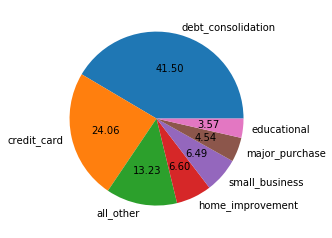

In [16]:
p = plt.pie(loans.purpose.value_counts(), labels=loans.purpose.unique(), autopct = '%.2f')

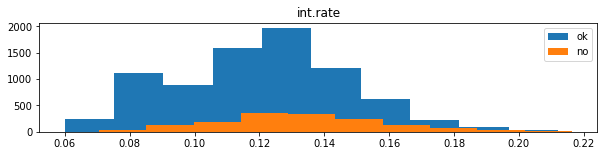

In [21]:
plt.figure(figsize = (10,2))
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==1], label='no')
p = plt.title('int.rate')
p = plt.legend()

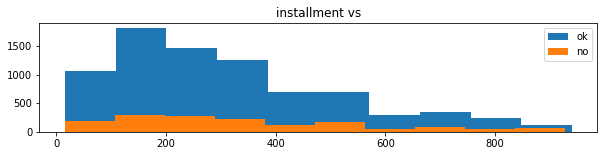

In [24]:
plt.figure(figsize=(10,2))
p = plt.hist(loans['installment'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['installment'][loans['not.fully.paid']==1], label='no')
p = plt.title('installment vs')
p = plt.legend()

In [31]:
loans['credit.policy'].unique()

array([1, 0], dtype=int64)

In [22]:
loans = pd.get_dummies(loans) #카테고리를 원핫 인코딩

In [25]:
X = loans.drop(columns = 'not.fully.paid')
y = loans['not.fully.paid']

In [26]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,0,1,0,0,0,0,0


In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5).fit(X,y)

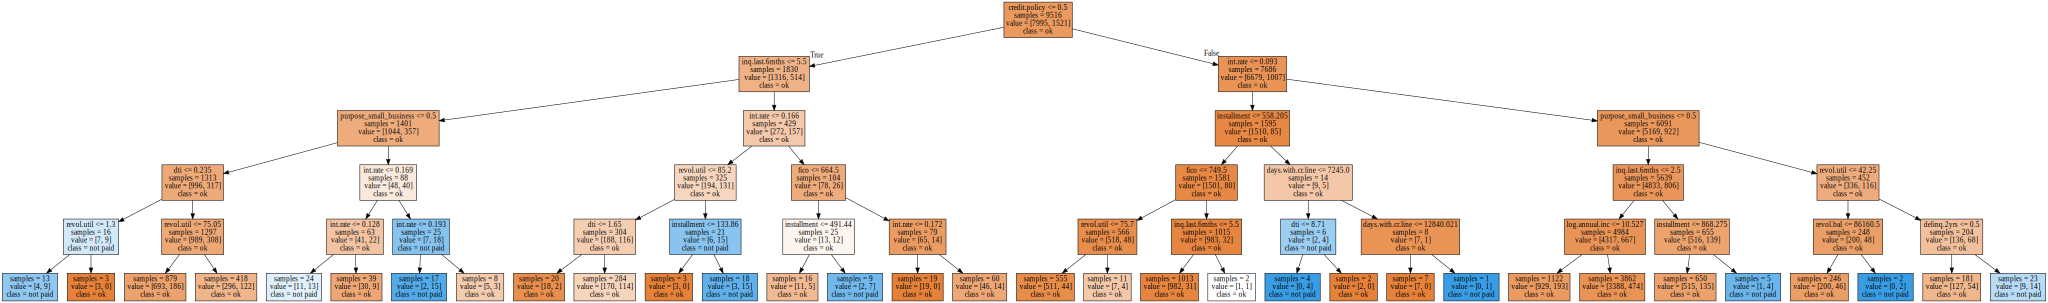

In [30]:
export_graphviz(model, out_file='loan.dot', class_names=['ok','not paid'],
               feature_names=X.columns, impurity=False, filled=True)
with open('loan.dot') as f:
    dot_graph = f.read()    
g = graphviz.Source(dot_graph)
display(g)